In [1]:
import networkx as nx 
from networkx import Graph, DiGraph
import pandas as pd
import time
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Question 1

(a):
clique of size 4 -> $(v_6, v_8, v_{11}, v_9)$\
(b):
maximal 1-plex -> $(v_6, v_8, v_{11}, v_9)$\
(c):
maximal 2-plex -> $(v_6,v_7,v_8,v_9,v_{11})$\
(d):
3-clique -> $(v_6,v_7,v_8)$\
(e):
2-club -> $(v_1,v_2,v_3,v_4,v_5,v_6)$\
(f):
1-core -> $(v_1,v_2,v_3)$\
(g):
2-core -> $(v_{11},v_{12},v_{13},v_{14})$\
(h):
2-core -> $(v_{11},v_{12},v_{13},v_{14})$\
(h):
2-shell -> $(v_{2},v_{6},v_{8},v_{9},v_{10},v_{11},v_{12})$


# Question 2

First we identify all cliques of size 3

$(v_1,v_2,v_3)$
$(v_2,v_3,v_4)$
$(v_5,v_6,v_7)$
$(v_6,v_7,v_8)$
$(v_8,v_9,v_{10})$
$(v_9,v_{10},v_{11})$
$(v_{10},v_{11},v_{12})$
$(v_{9},v_{10},v_{12})$
$(v_{9},v_{11},v_{12})$

Then we connect those cliques that share 2 neighbors.

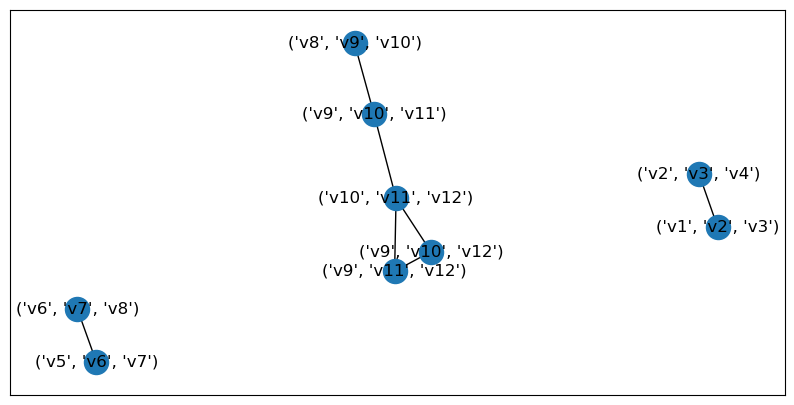

In [50]:
import networkx as nx

# Instantiate the graph
clique_graph = nx.Graph()

# Define cliques as tuples of nodes
c1 = ("v1", "v2", "v3")
c2 = ("v2", "v3", "v4")
c3 = ("v5", "v6", "v7")
c4 = ("v6", "v7", "v8")
c5 = ("v8", "v9", "v10")
c6 = ("v9", "v10", "v11")
c7 = ("v9", "v10", "v12")
c8 = ("v10", "v11", "v12")
c9 = ("v9", "v11", "v12")

# Add edges between cliques
clique_graph.add_edge(c1, c2)
clique_graph.add_edge(c3, c4)
clique_graph.add_edge(c5, c6)
clique_graph.add_edge(c6, c8)
clique_graph.add_edge(c7, c8)
clique_graph.add_edge(c8, c9)
clique_graph.add_edge(c7, c9)

pos = nx.spring_layout(clique_graph, seed=10)

plt.figure(figsize=(10,5))
nx.draw_networkx(clique_graph, pos=pos)


# Resulting Communities
Community 1:
$(v_5,v_6,v_7,v_8)$
Community 2:
$(v_9,v_{10},v_{11},v_{12})$
Community 3:
$(v_1,v_{2},v_{3},v_{4})$